# Heading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ms_data=pd.read_csv("middleSchoolData.csv")
ms_data.head()

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,6,0,24890.0,20.15,3.3,31.8,61.3,0.9,...,2.45,3.33,2.32,36.6,97.6,7.5,333.0,2.70,0.33,0.26
1,01M140,P.S. 140 NATHAN STRAUS,6,0,23536.0,24.56,5.7,12.4,78.7,0.5,...,4.11,3.12,3.26,31.0,87.3,9.7,371.0,2.71,0.31,0.24
2,01M184,P.S. 184M SHUANG WEN,67,23,16206.0,29.69,69.4,3.7,13.5,6.1,...,2.75,3.38,2.91,16.5,67.5,15.1,684.0,4.28,0.68,0.74
3,01M188,P.S. 188 THE ISLAND SCHOOL,0,0,21960.0,24.09,1.8,29.3,66.1,0.0,...,4.99,4.99,4.99,29.1,91.5,15.9,433.0,4.54,0.28,0.24
4,01M301,"TECHNOLOGY, ARTS, AND SCIENCES STUDIO",11,0,25444.0,15.80,3.8,32.1,54.7,3.8,...,NaN,NaN,NaN,42.5,82.1,2.8,106.0,NaN,0.33,0.20


Data cleaning

In [3]:
data_null=pd.DataFrame(ms_data.isnull().sum(),columns=["number_of_nan"])
dtypes_null=pd.DataFrame(ms_data.dtypes,columns=["dtypes_of_nan"])
data_skew=pd.DataFrame(ms_data.skew(),columns=["skew"])

data_info=pd.concat([data_null,dtypes_null, data_skew],axis=1)
pd.set_option('display.max_rows', None)
data_info

,number_of_nan,dtypes_of_nan,skew
dbn,0,object,NaN
school_name,0,object,NaN
applications,0,int64,2.987186
acceptances,0,int64,5.078125
per_pupil_spending,121,float64,1.959299
avg_class_size,121,float64,-0.024814
asian_percent,2,float64,2.215187
black_percent,2,float64,0.579481
hispanic_percent,2,float64,0.361108
multiple_percent,2,float64,2.520995


For all quantitative variables, if the skew is above .5, replace NaN with the median. Otherwise replace with the mean.

In [4]:
list_of_object=[]
list_of_quant=[]

for i in range(len(data_info)):
    if data_info["dtypes_of_nan"][i]=="object":
        list_of_object += [data_info.index[i]]
    else:
        list_of_quant += [data_info.index[i]]

for i in list_of_quant:
    if abs(ms_data[i].skew()) >= .5:
        ms_data[i] = ms_data[i].fillna(ms_data[i].median())
    else:
        ms_data[i] = ms_data[i].fillna(ms_data[i].mean())
        
for i in list_of_object:
    ms_data[i] = ms_data[i].fillna(ms_data[i].mode())

In [5]:
data_null=pd.DataFrame(ms_data.isnull().sum(),columns=["number_of_nan"])
data_null 

,number_of_nan
dbn,0
school_name,0
applications,0
acceptances,0
per_pupil_spending,0
avg_class_size,0
asian_percent,0
black_percent,0
hispanic_percent,0
multiple_percent,0


# Question 1

R value:  0.8017265370719315


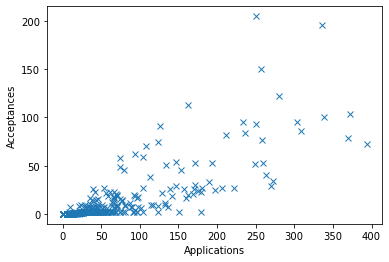

In [6]:
plt.plot(ms_data["applications"],ms_data["acceptances"],"x")
plt.xlabel("Applications")
plt.ylabel("Acceptances")
corr1=np.corrcoef(ms_data["applications"],ms_data["acceptances"])
print("R value: ",corr1[0,1])

Using np.corrcoef, I was able to find the correlation between number of applications and number of acceptances per school. I also included a scatter plot to help visualize the data. 

# Question 2

0.6561970581962338

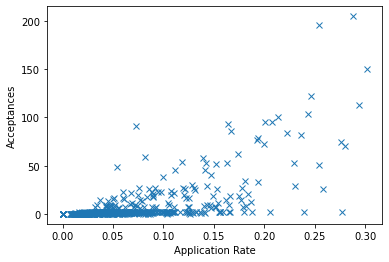

In [8]:
ms_data["application_rate"]=ms_data["applications"]/ms_data["school_size"]

plt.plot(ms_data["application_rate"],ms_data["acceptances"],"x")
plt.xlabel("Application Rate")
plt.ylabel("Acceptances")
corr1=np.corrcoef(ms_data["application_rate"],ms_data["acceptances"])
corr1[0,1]

0.8017265370719315

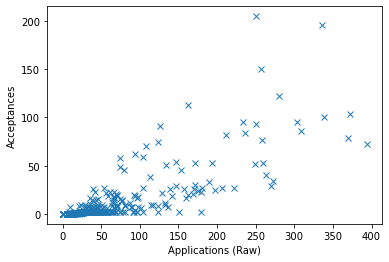

In [9]:
plt.plot(ms_data["applications"],ms_data["acceptances"],"x")
plt.xlabel("Applications (Raw)")
plt.ylabel("Acceptances")
corr2=np.corrcoef(ms_data["applications"],ms_data["acceptances"])
corr2[0,1]

From this, we see that the correlation between application rate and acceptances is lower than the correlation between raw number of applications and acceptances. Therefore, raw number of applications is a better predictor of admission.

# Question 3

In [10]:
ms_data["per_student_acceptance"]=ms_data["acceptances"]/ms_data["school_size"]
max_psa=0
max_index=0
for i in range(len(ms_data["per_student_acceptance"])):
    if ms_data["per_student_acceptance"][i]>max_psa:
        max_psa=ms_data["per_student_acceptance"][i]
        max_index=i
        
print(ms_data["school_name"][max_index]," has the highest per-student odds of sending someone too HSPHS")
print("Per student acceptance rate: ",max_psa)

THE CHRISTA MCAULIFFE SCHOOL\I.S. 187  has the highest per-student odds of sending someone too HSPHS
Per student acceptance rate:  0.23482245131729668


# Question 4

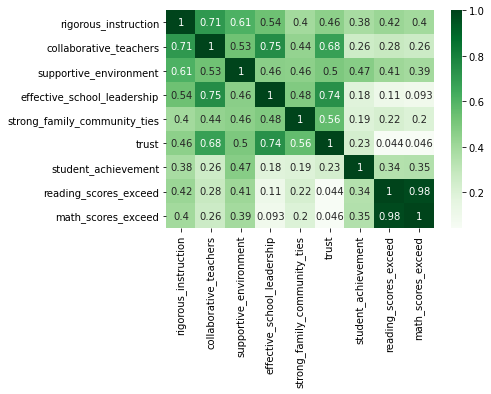

In [11]:
perception_of_school=pd.DataFrame(data=ms_data,columns=["rigorous_instruction","collaborative_teachers",
    "supportive_environment","effective_school_leadership","strong_family_community_ties","trust","student_achievement","reading_scores_exceed","math_scores_exceed"])
sns.heatmap(perception_of_school.corr(),cmap="Greens",annot=True)


There does not seem to be a relationship between how students perceive their school and objective measures of achievement. This is because there is not a single correlation between the 6 variables of subjective perception and the 3 variables of objective achievement that is above .5.

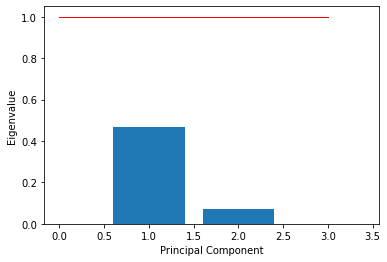

In [14]:
from scipy import stats 
from sklearn.decomposition import PCA

obj_df = pd.DataFrame(ms_data, columns = ["student_achievement","math_scores_exceed","reading_scores_exceed"])
climate_df = pd.DataFrame(ms_data, columns=["trust","strong_family_community_ties","rigorous_instruction","effective_school_leadership","supportive_environment","collaborative_teachers"])

zscored_data = stats.zscore(obj_df)
pca = PCA()
pca.fit(obj_df)
eig_vals = pca.explained_variance_
rotated_data_obj = pca.fit_transform(obj_df)

num_cols=0
for i in obj_df.columns:
    num_cols+=1
plt.bar(np.linspace(1, num_cols, num_cols), eig_vals)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")

plt.plot([0,num_cols],[1,1],color="red", linewidth = 1)

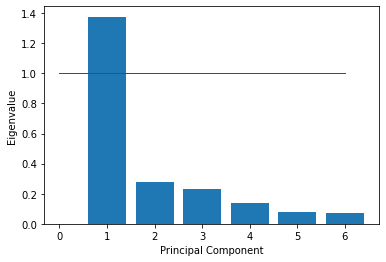

In [15]:
zscored_data = stats.zscore(climate_df)
pca = PCA()
pca.fit(climate_df)
eig_vals = pca.explained_variance_
rotated_data_climate = pca.fit_transform(climate_df)

num_cols=0
for i in climate_df.columns:
    num_cols+=1
plt.bar(np.linspace(1, num_cols, num_cols), eig_vals)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")

plt.plot([0,num_cols],[1,1],color="red", linewidth = 1)

0.36429470488730725

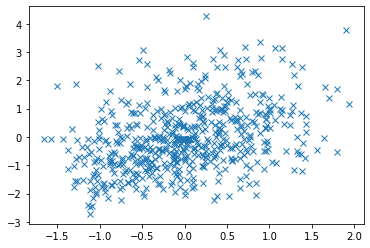

In [16]:
component1 = rotated_data_obj[:,0]
component2 = rotated_data_climate[:,0]
plt.plot(component1, component2, "x")
np.corrcoef(component1, component2)[0,1]

I ran a PCA for both types of variables. The first being "how students perceive their schools" which are conveyed in the columns in "climate_df" and the second one being "objective measures of achievement" which are conveyed in the "obj_df" dataframe. Using pca, I found one factor for each that seemed to explain most of the data, and correlated these two factors. These two factors do not seem to be related, with a r value of 0.36.

# Question 5

**Null Hypothesis:** There is no significant difference between the student achievement scores of students that come from large schools vs. small schools. 

**Alternative Hypothesis** The difference in student achievement scores between large and small schools is significant and is not due to chance. 

(array([ 76., 167., 163.,  75.,  49.,  32.,  17.,   8.,   6.,   1.]),
 array([  33. ,  253.5,  474. ,  694.5,  915. , 1135.5, 1356. , 1576.5,
        1797. , 2017.5, 2238. ]),
 <a list of 10 Patch objects>)

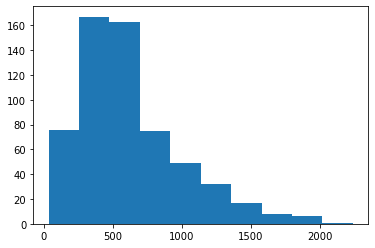

In [17]:
plt.hist(ms_data["school_size"])

In [18]:
ms_data["large_or_small"]=ms_data["school_size"].map(lambda s: 1 if s>500 else 0)
ms_data["large_or_small"].value_counts()

1    327
0    267
Name: large_or_small, dtype: int64

In [19]:
ms_data.groupby("large_or_small")["student_achievement"].mean()

large_or_small
0    3.333691
1    3.458393
Name: student_achievement, dtype: float64

In [55]:
small_schools=[]
large_schools=[]

for i in range(len(ms_data["large_or_small"])):
    if ms_data["large_or_small"][i]==0:
        small_schools+=[ms_data["student_achievement"][i]]
    else:
        large_schools+=[ms_data["student_achievement"][i]]

In [68]:
import random
sample1=[]
sample2=[]
for i in range(40):
    s1 = random.randint(0,len(small_schools)-1)
    sample1+=[small_schools[s1]]
    s2 = random.randint(0,len(large_schools)-1)
    sample2+=[large_schools[s2]]
print(sample1)
print(sample2)
print()
print("Means:")
print(sum(sample1) / len(sample1))
print(sum(sample2) / len(sample2))

[3.4023400365630727, 3.97, 4.42, 4.26, 3.41, 3.34, 2.8, 3.08, 2.51, 4.25, 2.9, 3.94, 4.99, 3.72, 3.7, 2.26, 1.7, 3.86, 3.94, 2.81, 2.4, 4.29, 3.4023400365630727, 3.77, 2.51, 3.24, 1.75, 2.72, 3.92, 3.74, 4.04, 3.16, 1.65, 3.97, 2.44, 1.5, 3.02, 3.89, 3.48, 3.41]
[3.18, 3.89, 3.1, 3.64, 3.55, 3.48, 3.08, 3.94, 3.48, 3.26, 3.48, 4.03, 3.19, 3.94, 2.58, 4.43, 3.62, 4.2, 3.19, 3.27, 3.12, 4.64, 3.55, 3.4023400365630727, 2.59, 3.21, 3.71, 4.5, 4.27, 4.44, 4.47, 4.38, 3.92, 4.61, 3.4023400365630727, 3.48, 3.4, 1.82, 3.64, 4.0]

Means:
3.2891170018281537
3.6271170018281524


In [69]:
mean_sample1 = sum(sample1) / len(sample1)
mean_sample2 = sum(sample2) / len(sample2)
sample_size = 40
d_f = 39

from scipy import stats

desc1 = stats.describe(sample1)
variance1 = desc1[3]
desc2 = stats.describe(sample2)
variance2 = desc2[3]

var_p = ((d_f / (2*d_f)) * variance1) + ((d_f/(2*d_f)) * variance2)
sem = np.sqrt((var_p / sample_size) + (var_p / sample_size))

t_score = (mean_sample1 - mean_sample2) / sem
print("T value: " , t_score)
print("Degrees of freedom: ", 78)

T value:  -2.0780641489008675
Degrees of freedom:  78


I chose to test whether or not large school sizes (>500) or small school size (<500) had a significant effect on student achievement scores. I created two lists of all the schools above 500 students, and below 500 students. I selected a random sample of 40 schools' student achievement scores from each list, and did an independent samples t test. The t value was -2.078. The degrees of freedom for this experiment is n1 + n2 - 2, which equals 78. The critical t value for this level of degrees of freedom is 1.990. I calculated a p-value of 0.02. This means that I reject the null hypothesis and conclude that there is a significant difference between the sample means of student achievement scores between large and small schools. 

# Question 6

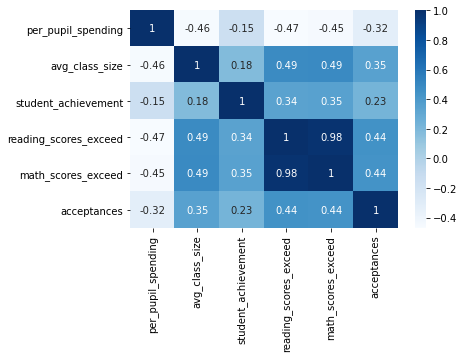

In [54]:
small_df = pd.DataFrame(data=ms_data, columns=["per_pupil_spending","avg_class_size","student_achievement","reading_scores_exceed","math_scores_exceed","acceptances"])
df_heatmap = sns.heatmap(small_df.corr(), annot=True, cmap="Blues")


There does not seem to be a very strong correlation between per_pupil_spending or avg_class_size and any of the objective measures of achievement variables. By looking at the top two rows of the heatmap, one can see that there aren't any correlations above 0.5. 

Now, in order to reduce the dimensions of the objective achievement variables, I used the rotated data from the objective achievement dataframe in question 4, and correlated it with both average class size and per pupil spending. I again found there to be no real significant correlation between the variables. 

In [71]:
objective_achievement = rotated_data_obj[:,0]

-0.21468802451871777

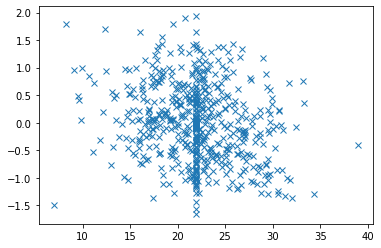

In [72]:
plt.plot(ms_data["avg_class_size"],objective_achievement,"x")
np.corrcoef(ms_data["avg_class_size"],objective_achievement)[0,1]


0.17569330479252826

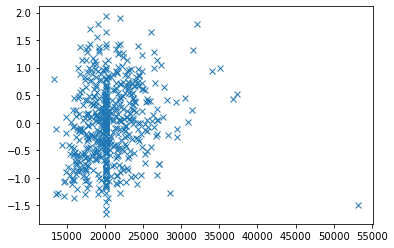

In [73]:
plt.plot(ms_data["per_pupil_spending"],objective_achievement,"x")
np.corrcoef(ms_data["per_pupil_spending"],objective_achievement)[0,1]

# Question 7

In [74]:
accept = []
for i in ms_data["acceptances"]:
    accept += [i]
accept.sort(reverse = True)
total_acceptances = sum(accept)

cutoff=total_acceptances* .9

num_acceptances = 0
schools = 0
for i in accept:
    num_acceptances += i
    schools += 1
    if num_acceptances > cutoff:
        print(num_acceptances)
        break
print(total_acceptances)
print()
print(schools)
print(ms_data.shape[0])
#593, 27

proportion = schools / ms_data.shape[0]
print("Proportion:", proportion)

4016
4461

123
594
Proportion: 0.20707070707070707


20.74% (.2074) of all schools included in the dataset account for 90% of student acceptances into HSPHS

In [75]:
groupby_data = ms_data.groupby("school_name")["acceptances"].mean()
list_of_acceptances=[]
list_of_schools=[]
list_of_IDs=[]
for i in range(len(groupby_data)):
    list_of_acceptances+=[groupby_data[i]]
    list_of_schools+=[groupby_data.index[i]]
    list_of_IDs+=[str(i)]
dict_school_acceptances={} #key -- school, item -- acceptances
dict_school_IDs={}         #key -- school, item -- ID
for i in range(len(list_of_acceptances)):
    dict_school_acceptances[list_of_schools[i]]=list_of_acceptances[i]
    dict_school_IDs[list_of_schools[i]]=list_of_IDs[i]
sorted_dict = dict(sorted(dict_school_acceptances.items(), key=lambda item: item[1]))
#add the names to a dictionary with the IDs and the acceptances to put in the bar graph
list_of_names_order = []
for i in sorted_dict:
    list_of_names_order+=[i]
dict_IDs_acceptances={}
for i in list_of_names_order[len(list_of_names_order)-1: 0: -1]:
    dict_IDs_acceptances[dict_school_IDs[i]] = dict_school_acceptances[i]

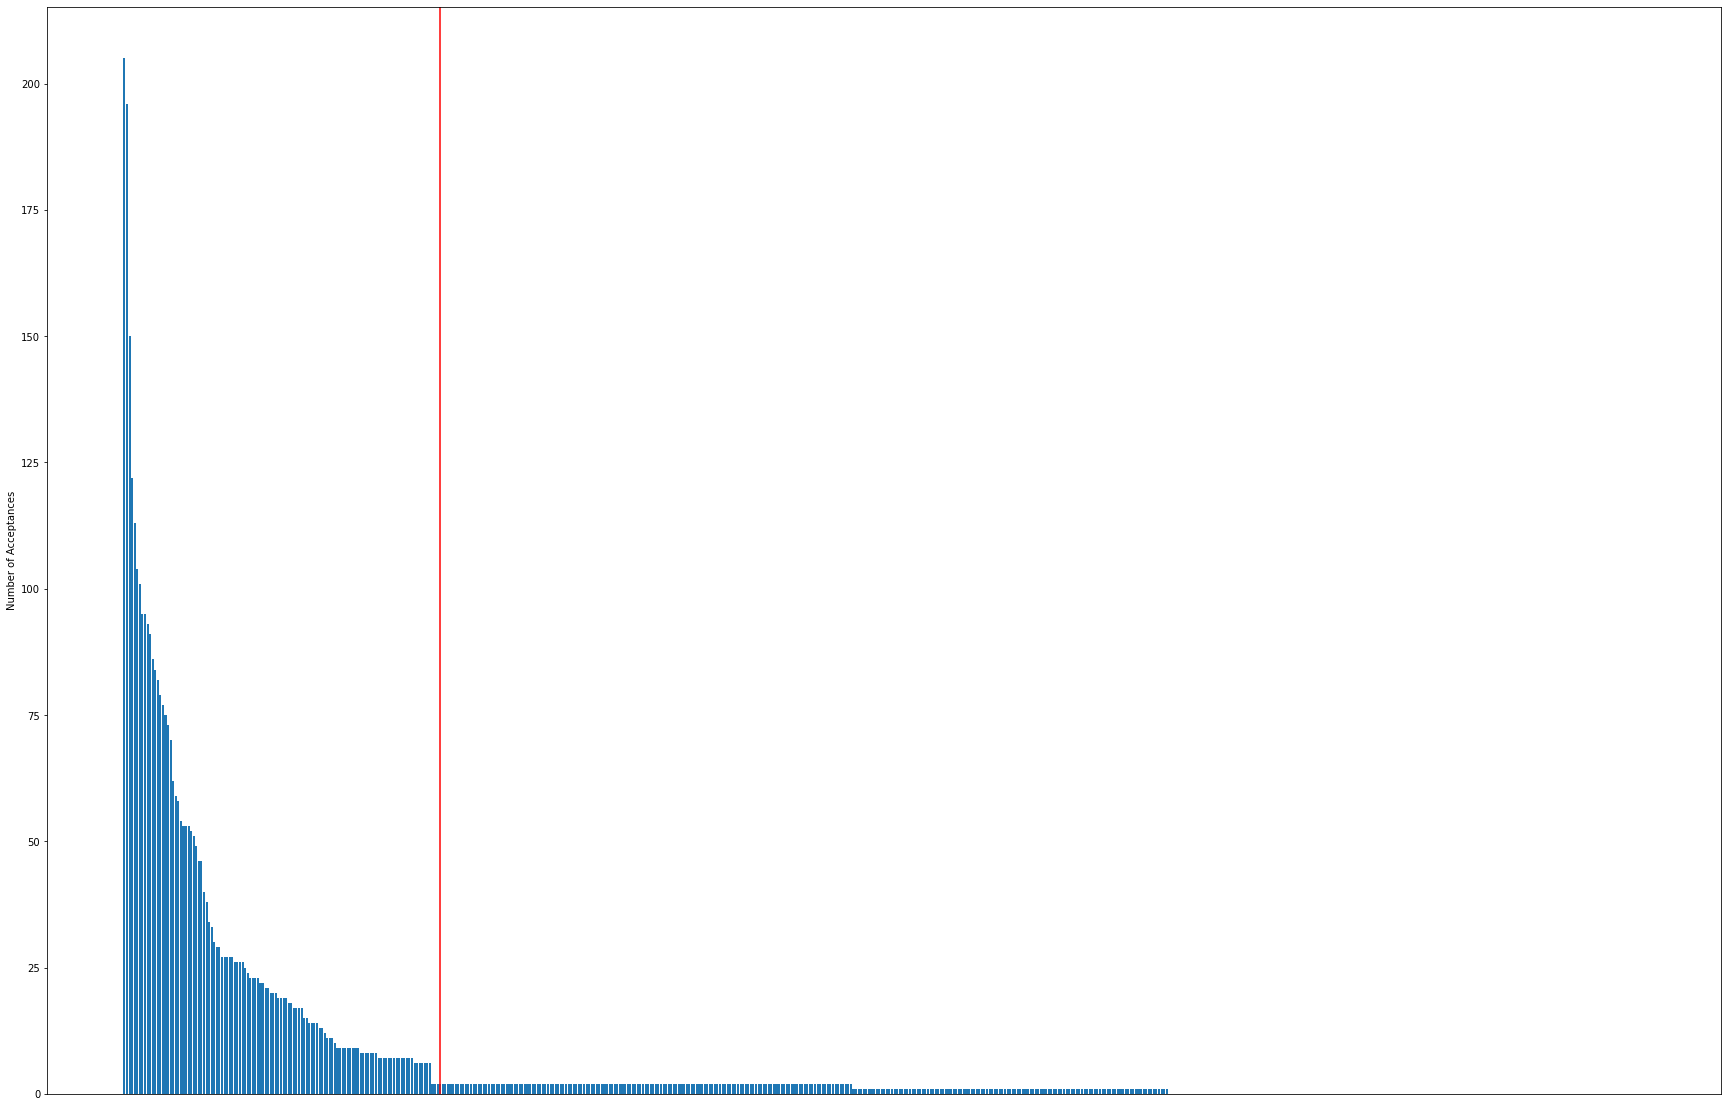

In [76]:
df = pd.DataFrame(list(dict_IDs_acceptances.items()),columns = ['School_ID','Acceptances']) 
plt.figure(figsize=(30,20))
plt.bar(df["School_ID"],df["Acceptances"])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel("Schools")
plt.ylabel("Number of Acceptances")
plt.axvline(x=123, color="red")
#the vertical line is the 90% cutoff

In this visualization, the red vertical line represents the 90% cutoff. 


# Question 8

[7.63576896e+00 3.72060885e+00 2.43870695e+00 1.89732001e+00
 1.47424663e+00 1.05000975e+00 8.27198897e-01 8.15082770e-01
 6.28714044e-01 6.04281166e-01 5.90506184e-01 5.10193595e-01
 4.78047225e-01 4.20598188e-01 3.94294551e-01 3.39133743e-01
 3.00251311e-01 2.63812335e-01 2.24005830e-01 1.77308517e-01
 1.22269659e-01 9.11456173e-02 2.45537853e-02 1.31336606e-02
 9.66287025e-04]


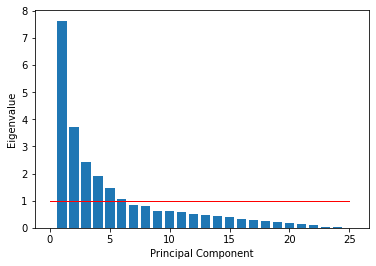

In [78]:
keys = []
for i in ms_data.columns:
    if i != "school_name" and i != "dbn":
        keys += [i]

zscore_msdata = pd.DataFrame(data = ms_data, columns = keys)
#create dataframe with only quantitative factors 

zscored_data = stats.zscore(zscore_msdata)
pca = PCA()
pca.fit(zscored_data)
eig_vals = pca.explained_variance_
print(eig_vals)

loadings = pca.components_
rotated_data = pca.fit_transform(zscore_msdata)

num_cols=0
for i in zscore_msdata.columns:
    num_cols+=1
plt.bar(np.linspace(1, num_cols, num_cols), eig_vals)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")

plt.plot([0,num_cols],[1,1],color="red", linewidth = 1)

In [79]:
print(eig_vals)

[7.63576896e+00 3.72060885e+00 2.43870695e+00 1.89732001e+00
 1.47424663e+00 1.05000975e+00 8.27198897e-01 8.15082770e-01
 6.28714044e-01 6.04281166e-01 5.90506184e-01 5.10193595e-01
 4.78047225e-01 4.20598188e-01 3.94294551e-01 3.39133743e-01
 3.00251311e-01 2.63812335e-01 2.24005830e-01 1.77308517e-01
 1.22269659e-01 9.11456173e-02 2.45537853e-02 1.31336606e-02
 9.66287025e-04]


In [80]:
loadings = pca.components_
loadings.shape

(25, 25)

In [81]:
col_names = []
for i in range(25):
    name = "PC" + str(i+1)
    col_names += [name]

In [102]:
loadings_df = pd.DataFrame(loadings, columns=col_names)
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.006607,-0.001954,0.998521,-0.000567,-0.001445,0.001155,0.001547,-0.000077,-0.001176,-0.000038,-0.000027,-0.000034,-9.873678e-07,0.000006,0.000004,0.001195,0.001773,0.000738,-0.053813,-0.000028,-0.000025,-0.000028,-0.000004,-0.000002,-0.000064
1,0.099003,0.020142,0.054285,0.002929,0.013707,-0.018408,-0.004022,-0.000446,0.009255,0.000095,0.000072,-0.000121,-4.948606e-05,-0.000425,-0.000184,-0.004675,-0.004104,0.001550,0.993059,0.000058,0.000098,0.000140,0.000014,0.000007,0.000878
2,0.895975,0.319843,0.001939,0.013988,0.137889,-0.159274,-0.104551,0.006791,0.117242,0.002220,0.001513,0.001522,5.327755e-04,-0.000261,0.000256,-0.006386,-0.121518,-0.014776,-0.102836,0.002862,0.001009,0.001063,0.000959,0.000335,-0.001696
3,-0.033580,-0.017432,-0.001117,0.011953,0.028236,-0.707820,0.670069,-0.017249,0.026311,0.000401,0.001445,0.000673,4.471688e-05,-0.002296,0.001091,0.015340,0.097558,0.191886,-0.007147,0.001145,-0.000570,-0.000389,-0.000116,-0.000022,-0.000624
4,-0.292183,0.052498,0.001641,0.035488,0.107240,-0.377253,-0.322491,0.037442,0.557635,0.005132,0.004476,0.003233,1.345153e-03,0.006998,0.001253,-0.026172,-0.572278,-0.109431,0.010593,0.004420,0.003187,0.003565,-0.000094,0.000181,0.002472


1. Characteristics that are important in sending students to HSPHS

In [83]:
#principal components most responsible for acceptances
pd.set_option("display.max_columns", 25)
loadings_df.loc[[1]]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
1,0.099003,0.020142,0.054285,0.002929,0.013707,-0.018408,-0.004022,-0.000446,0.009255,0.000095,0.000072,-0.000121,-0.000049,-0.000425,-0.000184,-0.004675,-0.004104,0.00155,0.993059,0.000058,0.000098,0.00014,0.000014,0.000007,0.000878


In [84]:
#see that the components most responsible for acceptances are components 19,1,3
#in that order

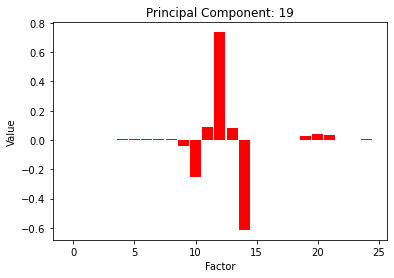

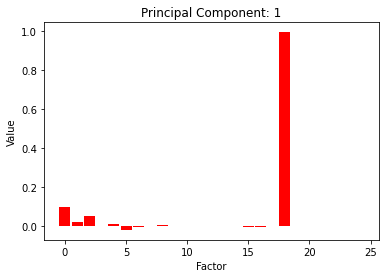

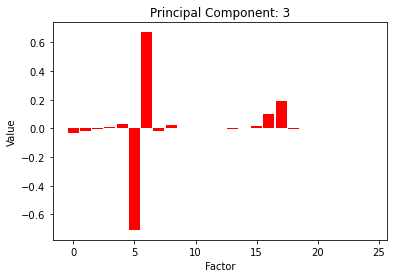

In [85]:
components_list_acceptances = [19,1,3]
for j in components_list_acceptances:
    num = j
    name = "cmp_"
    comp_num = name + str(num)
    comp_num = loadings[num]

    dict_num = "dict_num" + str(num)
    dict_num = {}
    for i in range(len(comp_num)):
        dict_num[i] = comp_num[i]
    indices = np.linspace(0,24,25)
    values = list(dict_num.values())
    plt.bar(indices, values, color="red",width = .9)

    plt.xlabel("Factor")
    plt.ylabel("Value")
    title_name = "Principal Component: " + str(num)
    plt.title(title_name)
    plt.show()

In [86]:
c = np.corrcoef(ms_data["school_size"], ms_data["applications"])
print(c[0,1])

0.6512289445142645


In [87]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

model = LinearRegression()
model.fit(zscore_msdata.drop("acceptances",axis=1), zscore_msdata.acceptances)

LinearRegression()

In [88]:
model = sm.ols("acceptances ~ rigorous_instruction + effective_school_leadership + trust + school_size + black_percent + hispanic_percent + applications", zscore_msdata).fit()
print(model.params)

Intercept                      13.386098
rigorous_instruction            1.029999
effective_school_leadership    -1.369966
trust                           0.484994
school_size                    -0.010904
black_percent                  -0.147599
hispanic_percent               -0.164606
applications                    0.288557
dtype: float64


In [89]:
m = model.params

0.8307413866541147

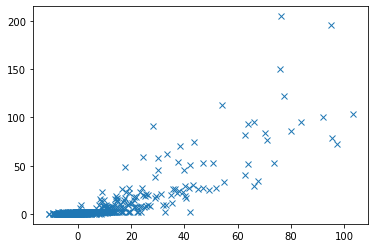

In [90]:
zscore_msdata["accept_pred"] =  m[0] + zscore_msdata[model.params.index[1]]*m[1] + zscore_msdata[model.params.index[2]]*m[2] + zscore_msdata[model.params.index[3]]*m[3] + zscore_msdata[model.params.index[4]]*m[4] + zscore_msdata[model.params.index[5]]*m[5] + zscore_msdata[model.params.index[6]]*m[6] + zscore_msdata[model.params.index[7]]*m[7]
plt.plot(zscore_msdata["accept_pred"],zscore_msdata["acceptances"],"x")
np.corrcoef(zscore_msdata["acceptances"],zscore_msdata["accept_pred"])[0,1]

In [91]:
#calculate rmse
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(zscore_msdata["acceptances"],zscore_msdata["accept_pred"])))

11.761289634674801


I created a linear regression model with the factors that I found to be the most important pertaining to "acceptances" from the PCA analysis. I then calculated a root mean squared error of 11.77. This means that the standard deviation of the variance that is unexplained by the model is 11.77 acceptances on average. 

2. Achieving high scores in objective measures of achievement

In [92]:
#student achievement
loadings_df.loc[[19]]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
19,-0.000191,0.000385,-0.000005,0.002348,0.007442,0.006704,0.007505,0.004004,0.008079,-0.039523,-0.249846,0.086787,0.735848,0.082776,-0.613353,0.002153,0.000949,0.001917,-0.000032,0.024939,0.042852,0.034538,0.002244,-0.000864,0.006878


In [93]:
#see that the components most responsible for student achievement are components 13,15,11
components_list_achievement = [13,15,11]

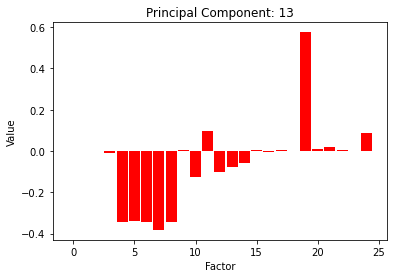

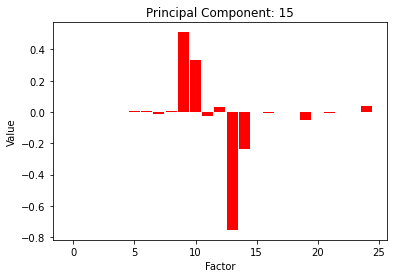

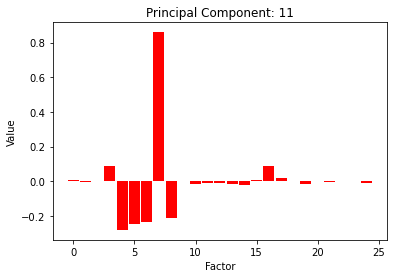

In [94]:
for j in components_list_achievement:
    num = j
    name = "cmp_"
    comp_num = name + str(num)
    comp_num = loadings[num]
    dict_num = "dict_num" + str(num)
    dict_num = {}
    for i in range(len(comp_num)):
        dict_num[i] = comp_num[i]
    indices = np.linspace(0,24,25)
    values = list(dict_num.values())
    plt.bar(indices, values, color="red",width = .9)

    plt.xlabel("Factor")
    plt.ylabel("Value")
    title_name = "Principal Component: " + str(num)
    plt.title(title_name)
    plt.show()

In [95]:
model2 = LinearRegression()
model2.fit(zscore_msdata.drop("student_achievement",axis=1), zscore_msdata.student_achievement)

LinearRegression()

In [96]:
model2 = sm.ols("student_achievement ~ black_percent + hispanic_percent + white_percent + multiple_percent + asian_percent + rigorous_instruction + strong_family_community_ties + trust + collaborative_teachers + supportive_environment", zscore_msdata).fit()
print(model2.params)

Intercept                       4.770246
black_percent                  -0.034175
hispanic_percent               -0.033596
white_percent                  -0.028009
multiple_percent               -0.046343
asian_percent                  -0.029702
rigorous_instruction            0.196374
strong_family_community_ties   -0.026193
trust                           0.082737
collaborative_teachers         -0.169409
supportive_environment          0.473477
dtype: float64


In [97]:
m2 = model2.params

In [98]:
zscore_msdata["stud_achiev_pred"] = m2[0] + zscore_msdata[m2.index[1]]*m2[1] + zscore_msdata[m2.index[2]]*m2[2] + zscore_msdata[m2.index[3]]*m2[3] + zscore_msdata[m2.index[4]]*m2[4] + zscore_msdata[m2.index[5]]*m2[5] + zscore_msdata[m2.index[6]]*m2[6] + zscore_msdata[m2.index[7]]*m2[7] + zscore_msdata[m2.index[8]]*m2[8] + zscore_msdata[m2.index[9]]*m2[9] + zscore_msdata[m2.index[10]]*m2[10]

In [99]:
#calculate rmse
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(zscore_msdata["student_achievement"],zscore_msdata["stud_achiev_pred"])))


0.5731980154809496


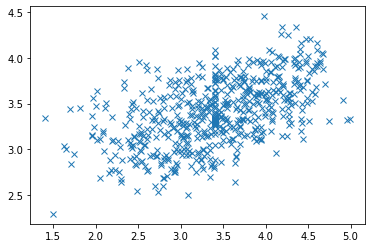

In [100]:
plt.plot(zscore_msdata["student_achievement"], zscore_msdata["stud_achiev_pred"],"x")

Similar to what was done in the first section, I created a multiple regression model using the factors that I found to be the most important in determining student achievement scores from my PCA analysis. The root mean squared error of 0.573 means that the standard deviation of the variance unexplained by the model is 0.573 student achievement points. 

In [101]:
for i in range(len(zscore_msdata.columns)):
    print("Factor: ",i,": ",zscore_msdata.columns[i])

Factor:  0 :  applications
Factor:  1 :  acceptances
Factor:  2 :  per_pupil_spending
Factor:  3 :  avg_class_size
Factor:  4 :  asian_percent
Factor:  5 :  black_percent
Factor:  6 :  hispanic_percent
Factor:  7 :  multiple_percent
Factor:  8 :  white_percent
Factor:  9 :  rigorous_instruction
Factor:  10 :  collaborative_teachers
Factor:  11 :  supportive_environment
Factor:  12 :  effective_school_leadership
Factor:  13 :  strong_family_community_ties
Factor:  14 :  trust
Factor:  15 :  disability_percent
Factor:  16 :  poverty_percent
Factor:  17 :  ESL_percent
Factor:  18 :  school_size
Factor:  19 :  student_achievement
Factor:  20 :  reading_scores_exceed
Factor:  21 :  math_scores_exceed
Factor:  22 :  application_rate
Factor:  23 :  per_student_acceptance
Factor:  24 :  large_or_small
Factor:  25 :  accept_pred
Factor:  26 :  stud_achiev_pred


For question 8 I began by making a heatmap of the categories just to get an idea of which variables were somewhat related to each other. I then created a separate dataframe with only the quantitative variables to run a PCA analysis. I created a screeplot which showed the principal components that carried the most variance. I then extracted the loadings matrix and input that into a separate dataframe to see the relationship between each principal component and each factor in the original zscored dataframe. Question 8 asked which school characteristics were most important in terms of a) sending students to HSPHS, and b) achieving high scores on objective measures of achievement. From the loadings dataframe that I created, I was able to extract the rows that pertained to 'acceptances' (the category associated with a) and 'student_achievement' (the category associated with b). From these rows, I looked at the three highest principal component loading scores and plotted them on 3 bar charts for both the category in (a) and the category in (b). 

I found that the school characteristics most important in terms of sending students to HSPHS are the categories relating to how students perceive their school. The most important of these factors include rigorous instruction, effective school leadership, and trust. I found that school size and applications were both significant in principal component 1, meaning that they are both important factors when determining number of acceptances. This makes sense because as the number of students in a school increases, the number of acceptances from that school should also increase. I also found that percentage of black and hispanic students at the school are important factors. I then used these factors to create a multiple regression model to predict number of acceptances for a given school. For this model, I calculated a root mean squared error of approximately 11.77. 

Different factors contribute to student achievement scores. I found that the factors most important in determining student achievement scores include the categories pertaining to diversity, such as black percent, hispanic percent, asian percent, white percent, and ESL percent. This means that overall diversity of a given school has an affect on average student achievement scores. In addition, I found that rigorous instruction, collaborative teachers, strong family community ties, and trust all have an effect on average student achievement scores as well. I created a multiple regression model for student achievement with the important factors that I found using PCA for student achievement. I calculated a root mean squared error of approximately 0.84. 

# Question 9

In question 1, I created a scatter plot between number of applications and acceptances into HSPHS, and calculated the Pearson r coefficient to be about 0.8. This means that as a given school sends out more applications, their number of acceptances increases. In question 4, I looked at the relationship between how students perceive their school and objective measures of achievement. I used PCA to reduce the dimensions of each category from several variables and found that there was no significant correlation between the two reduced variables.

I then performed a t-test to test whether there was a significant difference in overall student achievement scores between large schools (size > 500) and small schools (<500). I found that there was a significant difference between the two samples' scores with a p-value of 0.02. From this I learned that larger schools contain students that have better student achievement scores. 

I used PCA again to see the relationship between material resources and objective measures of achievement. I used the same reduced variable for objective measures of achievement that I used in question 2, and correlated it with both average class size and per pupil spending, and did not find a significant correlation. This means that average class size and per pupil spending do not have much of an effect on student achievement scores. 

To find other components that have an effect on number of acceptances, I ran a principal component analysis on the data. As stated in question 8, I found that measures of how students perceive their school are most important in determining how many acceptances a school will get. The most important of these factors specifically include rigorous instruction, effective school leadership, and trust. In principal component 1, these three categories had the largest absolute loading values, meaning that they combine to form most of this component's content. 

In the second principal component, school size was the most important factor by far. School size is another factor that has a great influence on number of acceptances from a given school. This relates to what I found in question 1, because there is a correlation of .65 between number of applications sent and school size and, intuitively, as a school size increases that school will likely send out more applications.

Most of the third principal component was domianted by black percent, hispanic percent. ESL percent also had a noteable loading value, meaning that these three factors are important when looking at number of acceptances. This means that overall diversity is also somewhat important when determining how many students from a school will be accepted into HSPHS.

# Question 10

In order to improve schools so that they send more students to HSPHS, I would recommend that they focus on the quality of teachers and staff at their schools. The data above shows that how students perceive their school has a large effect on the number of acceptances from that school. The more positively the students view their school, the more acceptances that school gets. Schools that have good leadership from their teachers, have high levels of trust, and have teachers that spend countless hours making sure the students understand the material will have a higher number of students accepted to HSPHS. Another factor that influences how many acceptances a school will get is school size and number of applications sent out. The more students that attend a school, the greater the number of students from that school will get accpeted into HSPHS. Therefore, schools should also take as many kids as possible and encourage them to put themselves out there and apply as much as they can!

If a school wants its students to have higher measures of achievement scores, however, it should focus on slightly different aspects. A school that wants to increase student achievement scores should focus on diversity of their students. Schools that have large numbers of students with high levels of diversity tend to do better on average student achievement scores. 